In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from logistic_regression import LogisticRegression as MyLogReg

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score, precision_score, recall_score

### Тестим на синтетическом датасете

In [4]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42, n_features=10)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Скейлим
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
clf = MyLogReg(lambda_coef=0.1)
clf.fit(X_train_scaled, y_train)
clf.get_weights()

array([-0.02930786, -0.37496443,  0.12567066, -1.60711949,  0.05717579,
       -0.10107528, -0.30828218,  1.50776127,  0.00292606, -1.09186706,
        0.13493626])

In [8]:
print(f'''
ROC_AUC = {roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])}
Accuracy = {accuracy_score(y_test, clf.predict(X_test_scaled))}
Precision = {precision_score(y_test, clf.predict(X_test_scaled))}
Recall = {recall_score(y_test, clf.predict(X_test_scaled))}
''')


ROC_AUC = 0.9210526315789473
Accuracy = 0.8454545454545455
Precision = 0.8802395209580839
Recall = 0.8258426966292135



! когда используем регуляризацию - нужно приводить признаки к одной шкале

In [9]:
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)
clf.intercept_, clf.coef_

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([-0.03075026]),
 array([[-0.53861057,  0.121392  , -1.20229655,  0.0543862 , -0.09584772,
         -0.29360421,  1.6751483 ,  0.00227308, -1.03871043,  0.12748741]]))

In [10]:
print(f'''
ROC_AUC = {roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])}
Accuracy = {accuracy_score(y_test, clf.predict(X_test_scaled))}
Precision = {precision_score(y_test, clf.predict(X_test_scaled))}
Recall = {recall_score(y_test, clf.predict(X_test_scaled))}
''')


ROC_AUC = 0.9210526315789475
Accuracy = 0.8424242424242424
Precision = 0.8795180722891566
Recall = 0.8202247191011236



### Тестим на breast cancer

In [11]:
from sklearn.datasets import load_breast_cancer

In [12]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
clf = MyLogReg(lambda_coef=0.1)
clf.fit(X_train_scaled, y_train)
clf.get_weights()

array([ 0.72480865, -0.8333736 , -1.00468291, -0.69440458,  0.27379454,
       -1.03074414, -0.02035755,  0.51128618, -0.38964601,  0.71431465,
        0.77619904, -1.18156381, -0.03379965, -0.95871585, -1.74829645,
       -0.00500095,  0.82066327, -0.75983879, -1.35541644,  0.77886135,
        1.76443451, -0.99423   , -0.97732227, -1.27553973, -0.55386058,
       -0.4771375 ,  0.88419175, -2.22120907, -0.69783401, -2.03629276,
       -0.73841766])

In [15]:
print(f'''
ROC_AUC = {roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])}
Accuracy = {accuracy_score(y_test, clf.predict(X_test_scaled))}
Precision = {precision_score(y_test, clf.predict(X_test_scaled))}
Recall = {recall_score(y_test, clf.predict(X_test_scaled))}
''')


ROC_AUC = 0.9950659923522882
Accuracy = 0.9840425531914894
Precision = 0.9916666666666667
Recall = 0.9834710743801653



In [16]:
clf1 = LogisticRegression()
clf1.fit(X_train_scaled, y_train)
clf1.intercept_, clf1.coef_

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([0.22736568]),
 array([[-0.3516251 , -0.37655363, -0.33495753, -0.41972051, -0.06366191,
          0.64300379, -0.811223  , -1.10573209,  0.14834269,  0.09877864,
         -1.186404  ,  0.22622604, -0.71993829, -0.83779011, -0.21586124,
          0.53898301,  0.05557123, -0.41243246,  0.48305708,  0.5833693 ,
         -0.76581951, -1.2785157 , -0.57058143, -0.74099971, -0.5432712 ,
          0.09813004, -0.9698811 , -0.74193056, -1.15218584, -0.12118608]]))

In [17]:
print(f'''
ROC_AUC = {roc_auc_score(y_test, clf1.predict_proba(X_test_scaled)[:, 1])}
Accuracy = {accuracy_score(y_test, clf1.predict(X_test_scaled))}
Precision = {precision_score(y_test, clf1.predict(X_test_scaled))}
Recall = {recall_score(y_test, clf1.predict(X_test_scaled))}
''')


ROC_AUC = 0.9977796965585297
Accuracy = 0.9787234042553191
Precision = 0.9915966386554622
Recall = 0.9752066115702479



Коэффициенты получаются разные, но скор все равно хороший

### Строим графики

In [18]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=1, class_sep=5, n_clusters_per_class=1, random_state=42)

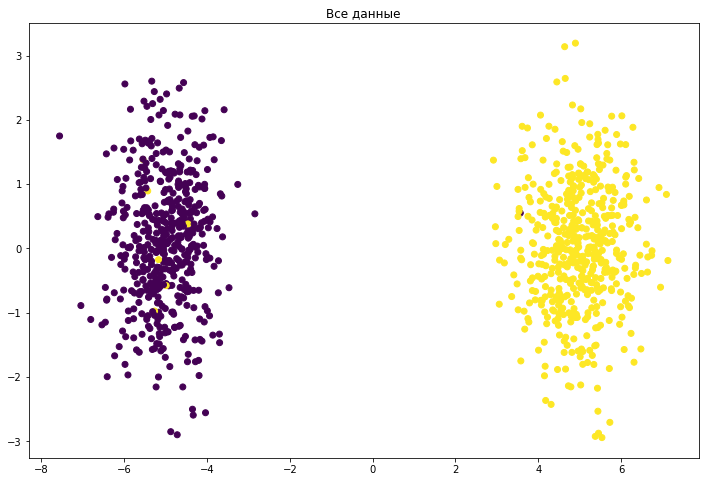

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o');
plt.title('Все данные');

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

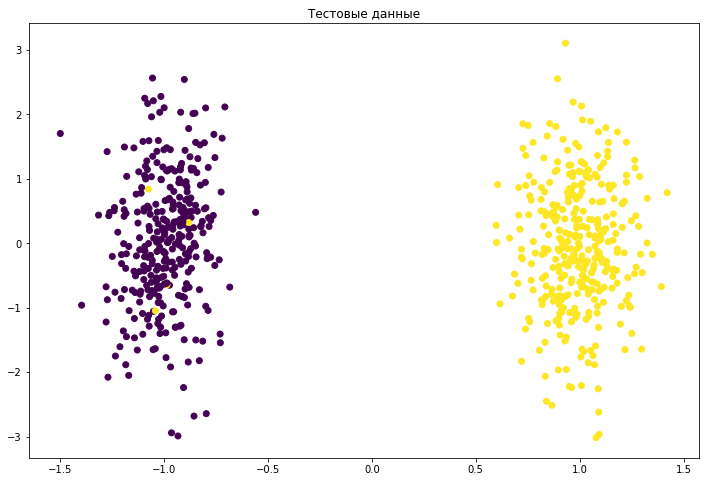

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, marker='o');
plt.title('Тестовые данные');

In [23]:
clf = MyLogReg(lambda_coef=0.1)
clf.fit(X_train_scaled, y_train)
w = clf.get_weights()
w

array([ 0.04720303,  3.38658283, -0.04722345])

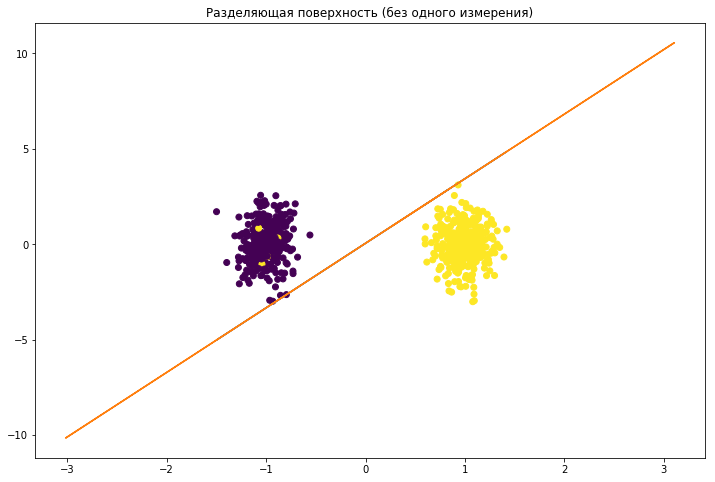

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, marker='o');
plt.plot(X_train_scaled, w[0] + w[1]*X_train_scaled);
plt.title('Разделяющая поверхность (без одного измерения)');

In [25]:
print(f'''
ROC_AUC = {roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])}
Accuracy = {accuracy_score(y_test, clf.predict(X_test_scaled))}
Precision = {precision_score(y_test, clf.predict(X_test_scaled))}
Recall = {recall_score(y_test, clf.predict(X_test_scaled))}
''')


ROC_AUC = 0.9908903908316191
Accuracy = 0.990909090909091
Precision = 0.9939393939393939
Recall = 0.9879518072289156



In [26]:
clf1 = LogisticRegression()
clf1.fit(X_train_scaled, y_train)
clf1.intercept_, clf1.coef_

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([0.44038001]), array([[ 4.57077884, -0.13643919]]))

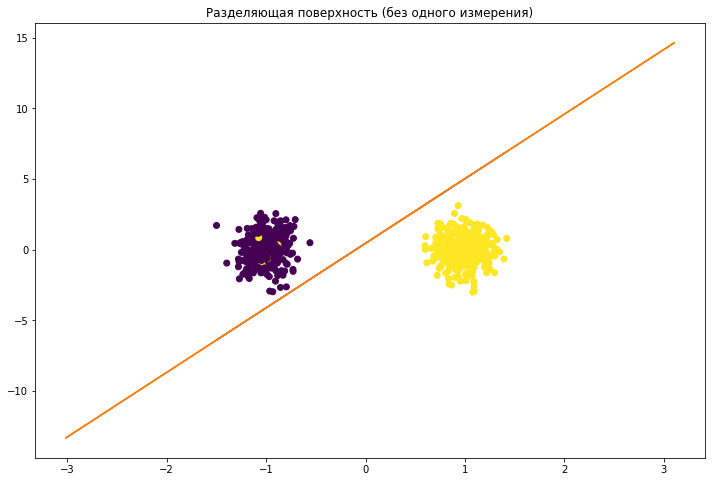

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, marker='o');
plt.plot(X_train_scaled, clf1.intercept_ + clf1.coef_[0][0]*X_train_scaled);
plt.title('Разделяющая поверхность (без одного измерения)');

In [28]:
print(f'''
ROC_AUC = {roc_auc_score(y_test, clf1.predict_proba(X_test_scaled)[:, 1])}
Accuracy = {accuracy_score(y_test, clf1.predict(X_test_scaled))}
Precision = {precision_score(y_test, clf1.predict(X_test_scaled))}
Recall = {recall_score(y_test, clf1.predict(X_test_scaled))}
''')


ROC_AUC = 0.9907067293564501
Accuracy = 0.990909090909091
Precision = 0.9939393939393939
Recall = 0.9879518072289156



### Тестим регуляризацию

In [29]:
clf = MyLogReg(lambda_coef=0.1, regularization='L1', alpha=.5)
clf.fit(X_train_scaled, y_train)
w = clf.get_weights()
w

array([ 0.39358393,  4.70113113, -0.17399322])

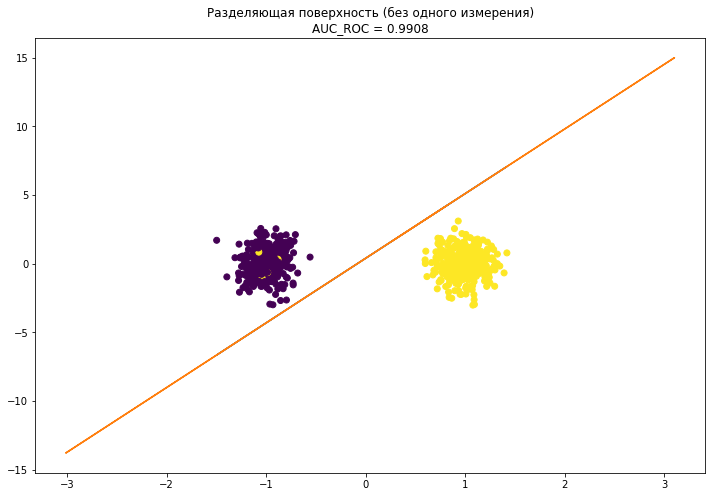

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, marker='o');
plt.plot(X_train_scaled, w[0] + w[1]*X_train_scaled);
plt.title(f'''Разделяющая поверхность (без одного измерения)
AUC_ROC = {roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1]).round(4)}''');

In [31]:
print(f'''
ROC_AUC = {roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])}
Accuracy = {accuracy_score(y_test, clf.predict(X_test_scaled))}
Precision = {precision_score(y_test, clf.predict(X_test_scaled))}
Recall = {recall_score(y_test, clf.predict(X_test_scaled))}
''')


ROC_AUC = 0.9907801939465177
Accuracy = 0.990909090909091
Precision = 0.9939393939393939
Recall = 0.9879518072289156



In [32]:
clf = MyLogReg(lambda_coef=0.1, regularization='L2', alpha=.5)
clf.fit(X_train_scaled, y_train)
w = clf.get_weights()
w

array([ 0.02258609,  2.64476636, -0.01921227])

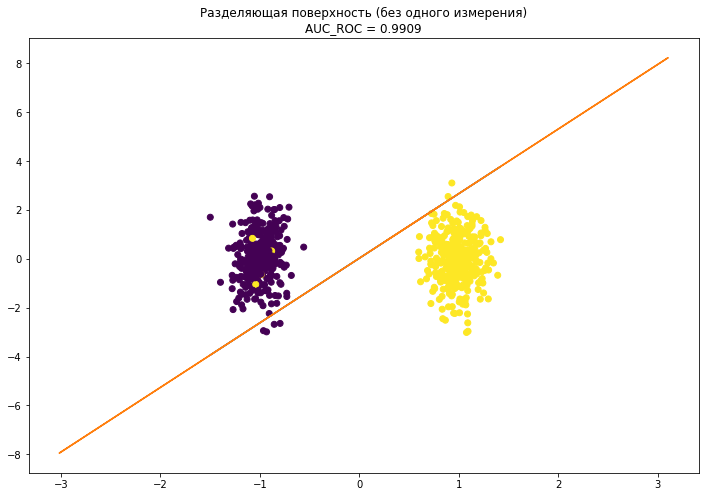

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, marker='o');
plt.plot(X_train_scaled, w[0] + w[1]*X_train_scaled);
plt.title(f'''Разделяющая поверхность (без одного измерения)
AUC_ROC = {roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1]).round(4)}''');

In [34]:
print(f'''
ROC_AUC = {roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])}
Accuracy = {accuracy_score(y_test, clf.predict(X_test_scaled))}
Precision = {precision_score(y_test, clf.predict(X_test_scaled))}
Recall = {recall_score(y_test, clf.predict(X_test_scaled))}
''')


ROC_AUC = 0.9909271231266529
Accuracy = 0.990909090909091
Precision = 0.9939393939393939
Recall = 0.9879518072289156



### Грид серч

In [35]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=1, n_clusters_per_class=1, random_state=42)

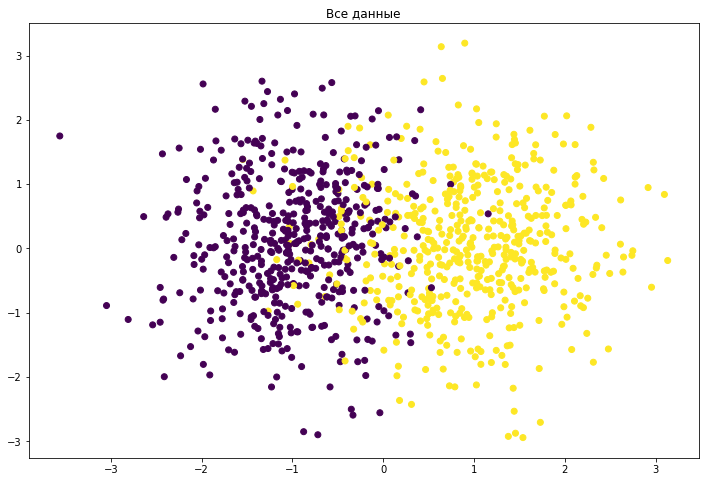

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o');
plt.title('Все данные');

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
l_rates = np.power(10., np.arange(-5, 0))
regs = [None, 'L1', 'L2']
alphas = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0]
res = []

In [39]:
for learning_rate in l_rates:
    for regularization in regs:
        if regularization is None:
            clf = MyLogReg(lambda_coef=learning_rate, regularization=regularization)
            clf.fit(X_train_scaled, y_train)
            res.append((learning_rate, None, None, 
                        {
                'ROC_AUC': roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1]),
                'Accuracy': accuracy_score(y_test, clf.predict(X_test_scaled)),
                'Precision': precision_score(y_test, clf.predict(X_test_scaled)),
                'Recall': recall_score(y_test, clf.predict(X_test_scaled))
            }))
            continue
        for alpha in alphas:
            clf = MyLogReg(lambda_coef=learning_rate, regularization=regularization, alpha=alpha)
            clf.fit(X_train_scaled, y_train)
            res.append((learning_rate, regularization, alpha, 
                        {
                'ROC_AUC': roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1]),
                'Accuracy': accuracy_score(y_test, clf.predict(X_test_scaled)),
                'Precision': precision_score(y_test, clf.predict(X_test_scaled)),
                'Recall': recall_score(y_test, clf.predict(X_test_scaled))
            }))

In [40]:
max(res, key=lambda x: x[3]['ROC_AUC'])

(0.1,
 None,
 None,
 {'ROC_AUC': 0.9670878636497209,
  'Accuracy': 0.9212121212121213,
  'Precision': 0.9430379746835443,
  'Recall': 0.8975903614457831})

In [41]:
max(res, key=lambda x: x[3]['Accuracy'])

(0.001,
 'L1',
 0.1,
 {'ROC_AUC': 0.9665001469291802,
  'Accuracy': 0.9212121212121213,
  'Precision': 0.9430379746835443,
  'Recall': 0.8975903614457831})

In [42]:
max(res, key=lambda x: x[3]['Precision'])

(0.0001,
 'L2',
 5.0,
 {'ROC_AUC': 0.9220540699382898,
  'Accuracy': 0.7393939393939394,
  'Precision': 0.9651162790697675,
  'Recall': 0.5})

In [43]:
max(res, key=lambda x: x[3]['Recall'])

(1e-05,
 'L1',
 5.0,
 {'ROC_AUC': 0.08345577431677932,
  'Accuracy': 0.503030303030303,
  'Precision': 0.503030303030303,
  'Recall': 1.0})